Ari Sulistiyo Prabowo

This notebook is a test that is given by BagiData company to apply a job as Data Scientist. There are two test including:
- Spam Comment Classification
- News Title Classification

#News Title Classification

In this test, I have to make a machine learning model to detect whether the comment is spam or not using **News Title.xlsx** data. The result should be 0 means not spam and 1 means spam. 

**Flowchart**

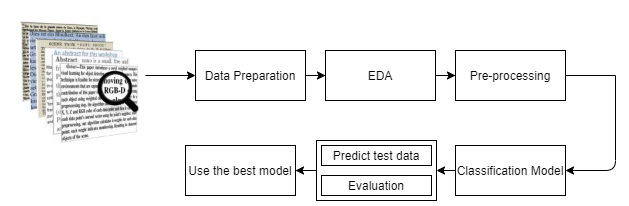


There are several steps to do this model:

**1. Data Preparation**
- Taking care the NaN Values and duplicate values

**2. Exploratory Data Analysis**
- Using WordCloud to show the most words in comment whether spam and not spam

**3. Text Cleaning & Data Preprocessing**
- Tokenizing the text
- Text Representations Vectorization

**4. Modelling Classification**
- KNN Classifier
- Logistic Regression
- SVC Classifier
- Decision Tree
- Random Forest
- Gradient Boosting
- Naive Bayes
- Assesing the model using Learning Curve

**5. Prediction**

**6. Summary**

## 1. Data Preparation

In [1]:
#import library
import pandas as pd
import numpy as np

#visualization library
import matplotlib.pyplot as plt
import seaborn as sns

#wordcloud library
from wordcloud import WordCloud, STOPWORDS
import datetime, nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

#machine learning library
from sklearn import svm
from sklearn import preprocessing, metrics, feature_selection
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
#connecting dataset from google drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [4]:
#read the dataset
directory = '/content/drive/My Drive/Data Ari/Data Science/Coding Test/BagiData'
comment_data = pd.ExcelFile(f'{directory}/News Title.xls')
comment_data.sheet_names

['Data Train']

In [5]:
#read the dataset and specific sheet
comment_data = pd.read_excel(f'{directory}/News Title.xls', sheet_name='Data Train')
comment_data = comment_data.iloc[:,1:] #skip the first column
comment_data.head()

,News Title,Category
0,Google+ rolls out 'Stories' for tricked out ph...,Technology
1,Dov Charney's Redeeming Quality,Business
2,White God adds Un Certain Regard to the Palm Dog,Entertainment
3,"Google shows off Androids for wearables, cars,...",Technology
4,China May new bank loans at 870.8 bln yuan,Business


### 1.1 Taking Care the NaN and Duplicate Values

In this section, I will analyse any null and duplicate values that will affect the modelling section

In [6]:
#dimension of dataset
print("There are {} rows and {} columns".format(comment_data.shape[0], comment_data.shape[1]))

#drop duplicate values
comment_data.drop_duplicates(inplace=True)
print("\nAfter droping duplicate values \nThere are {} rows and {} columns left\n".format(comment_data.shape[0], comment_data.shape[1]))

#show any null values
null = pd.DataFrame(comment_data.dtypes).T.rename(index = {0:'Columns Type'})
null = null.append(pd.DataFrame(comment_data.isnull().sum()).T.rename(index = {0:'Amount of Null Values'}))
null = null.append(pd.DataFrame(comment_data.isnull().sum()/comment_data.shape[0]*100).T.rename(index = {0: 'Percentage of Null Values'}))
display(null)

There are 65535 rows and 2 columns

After droping duplicate values 
There are 65039 rows and 2 columns left



,News Title,Category
Columns Type,object,object
Amount of Null Values,0,0
Percentage of Null Values,0,0


After taking care null and duplicate values. Now, I have **65039** rows and **2 columsn** left without any duplicate and null values.

The data is ready to move and process in the exploratory data analysis process

## 2. Exploratory Data Analysis

### 2.1 Explore the most frequently occuring words

This section is usefull to see the first insight of our data. It could be about specific news such as politic and specific country that use abbreviation such us US and so forth.

Therefore, wordcloud will help us to the next step in pre-processing section

In [7]:
#stopwords are used to remove any redundant words
stopwords = set(STOPWORDS)

#setting the wordcloud
words_comment = WordCloud(background_color = 'white', max_words = 3000,
                          stopwords = stopwords)

#generate the word cloud
text = " ".join(news for news in comment_data['News Title'])
words_comment.generate(text)

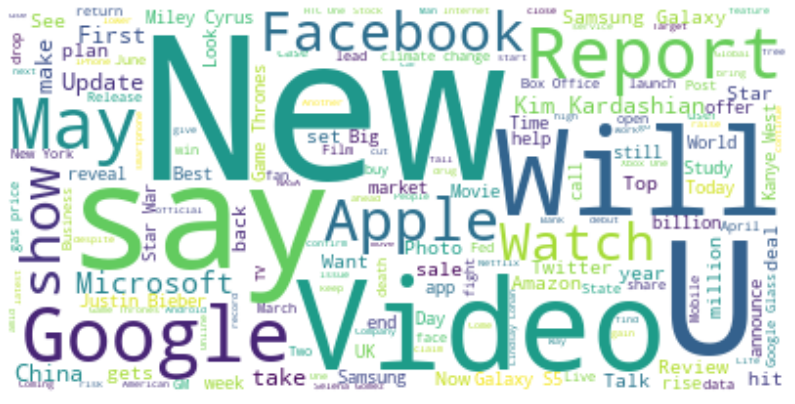

In [8]:
#show the generated image
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(words_comment, interpolation='bilinear')
plt.axis('off')
plt.show()

## 3. Data Preprocessing

### 3.1 Tokenizing the text in news title column

What is tokenizing?

Tokenizing means splitting the text into minimal meaningful. It is also a step in data preprocessing before to the step of modelling data.

I also input the Lemma (linguistics) which means a word that sntands at the head of a definition in a dictionary

In [9]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [10]:
def process_text(text):
  from nltk.corpus import stopwords 
  from nltk.tokenize import word_tokenize
  
  #remove the punction that is not important
  nopunc = [char for char in text if char not in string.punctuation]
  nopunc = ''.join(nopunc)
  nopunc = nopunc.lower()
  
  #remove useless word in data
  stop_words = set(stopwords.words('english')) 
  
  word_tokens = word_tokenize(nopunc) 
  
  clean_words = [w for w in word_tokens if not w in stop_words] 
  return clean_words

In [11]:
comment_data['News Title'].apply(process_text)

0        [google, rolls, stories, tricked, photo, playb...
1                      [dov, charneys, redeeming, quality]
2        [white, god, adds, un, certain, regard, palm, ...
3          [google, shows, androids, wearables, cars, tvs]
4          [china, may, new, bank, loans, 8708, bln, yuan]
                               ...                        
65530    [xbox, one, homebrew, likely, reality, short, ...
65531    [maker, recalls, 19, million, rearfacing, infa...
65532              [watch, first, ninja, turtles, trailer]
65533    [23052014dogs, triumph, cannes, canine, thrill...
65534    [frontpoint, security, ceo, chris, villar, ran...
Name: News Title, Length: 65039, dtype: object

In [12]:
def value_counts_word(x):
  word_list = []

  for word in x:
    word_list.extend(word)
  word_freq = pd.Series(word_list).value_counts()

  return word_freq[:10]

In [13]:
value_counts_word(comment_data['News Title'].apply(process_text))

new        3784
us         2842
google     1673
video      1534
says       1472
2014       1374
apple      1374
first      1251
may        1238
samsung    1169
dtype: int64

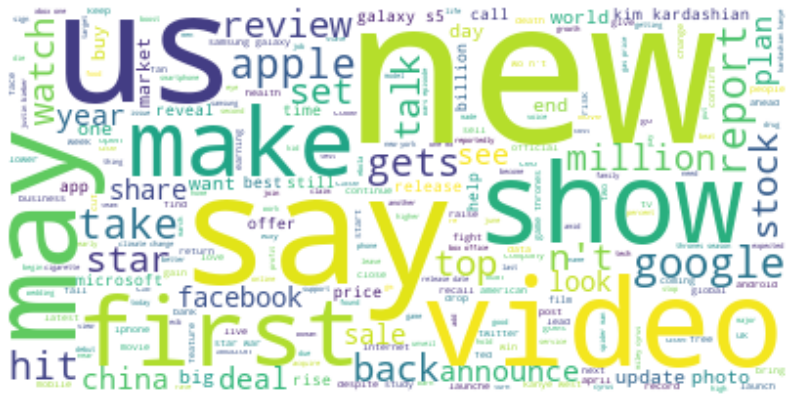

In [14]:
clean = " ".join(process_text(comment_data['News Title']))
words_comment.generate(clean)

#show the generated image
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(words_comment, interpolation='bilinear')
plt.axis('off')
plt.show()

After doing any tokenization and normalization of our text data, now I am able to see the text data contains news from US, big tech company such as google, apple, facebook, and the news are taken in 2014.

### Text Representation Method

In this section, I am going to do a feature engineering to count how many unique words and replace it into columns.

There are two types to do this:
1. Using Bag of Work
2. Using TF-IDF

In the first task of comment spam, I use Bag of Work to count of occurance words in a sentence. But, in this task I use TF-IDF.

The question is why I use TF-IDF instead of Bag of Work. Bag of Work will in cell values are count of occurance. On the other hand, in TF-IDF, the couns are normalized with inverse document frequency. So, using TF-IDF is better than BoW.

In [15]:
#import Tfidf library
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
tv_matrix = TfidfVectorizer(analyzer=process_text, min_df=0., max_df=1., use_idf=True).fit_transform(comment_data['News Title'])
tv_matrix.shape

(65039, 33751)

In [17]:
#split the dataset into 80% training data and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(tv_matrix, comment_data['Category'], test_size=0.20, random_state=0)

## 3. Modeling

The data is large and I will use several models to train our data until we get the best result. I will use:
- KNN Classifier
- Logistic Regression
- SVC Classifier
- Decision Tree
- Random Forest
- Gradient Boosting
- Naive Bayes

In [18]:
#class for several parameter of my model
class Class(object):
    def __init__(self, clf, params=None):
        if params:
            self.clf = clf(**params)
        else:
            self.clf = clf()
            
    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)
        
    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict_test(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Testing Accuracy: {:.2f}%".format(100*metrics.accuracy_score(Y, self.predictions)))
        
    def predict_test(self, X, Y):
        self.predictions = self.grid.predict(X)
        print(self.predictions)

    def grid_predict_train(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Training Accuracy: {:.2f}%".format(100*metrics.accuracy_score(Y, self.predictions)))

In [19]:
#Metrics to assess my model whether overfitting or underfitting
def plot_learning_curve(estimator, title, X, Y, ylim = None, cv = None,
                       n_jobs = 1, train_sizes = np.linspace(.1, 1.0, 10)):
    """
    Generate the plot of test and training learning curve
    """
    sns.set_style("dark")
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('Training Sample')
    plt.ylabel('Score')
    train_sizes, train_scores, test_scores = learning_curve(estimator,
                                                           X, Y, cv=cv, n_jobs=n_jobs,
                                                           train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    test_scores_mean = np.mean(test_scores, axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha = 0.1, color = 'r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha = 0.1, color = 'g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label = 'Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label = 'Cross-validation curve')
    
    plt.legend(loc='best')
    return plt

### 3.1 KNN Classifier

In [20]:
knn = Class(clf = KNeighborsClassifier)
knn.grid_search(parameters = [{'n_neighbors':np.arange(1,50,1)}], Kfold = 5)
knn.grid_fit(X = X_train, Y = y_train)
knn.grid_predict_train(X_train, y_train)
knn.grid_predict_test(X_test, y_test)

Training Accuracy: 93.17%
Testing Accuracy: 90.42%


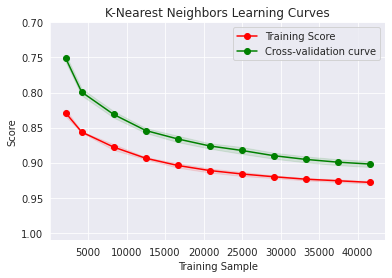

In [21]:
g = plot_learning_curve(knn.grid.best_estimator_, 'K-Nearest Neighbors Learning Curves',
                       X_train, y_train, ylim = [1.01, 0.7], cv = 5,
                       train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### 3.2 Logistic Regression

In [22]:
lr = Class(clf = LogisticRegression)
lr.grid_search(parameters = [{'C':np.logspace(-2, 2,20)}], Kfold = 5)
lr.grid_fit(X = X_train, Y = y_train)
lr.grid_predict_train(X_train, y_train)
lr.grid_predict_test(X_test, y_test)

Training Accuracy: 98.22%
Testing Accuracy: 92.07%


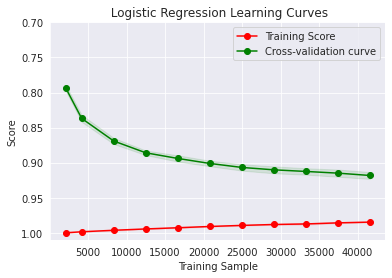

In [23]:
g = plot_learning_curve(lr.grid.best_estimator_, ' Logistic Regression Learning Curves',
                       X_train, y_train, ylim = [1.01, 0.7], cv = 5,
                       train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### 3.3 Support Vector Machine - Classifier

In [24]:
svc = Class(clf = svm.LinearSVC)
svc.grid_search(parameters = [{'C': np.logspace(-2, 2, 10)}], Kfold = 5)
svc.grid_fit(X = X_train, Y = y_train)
svc.grid_predict_train(X_train, y_train)
svc.grid_predict_test(X_test, y_test)

Training Accuracy: 98.01%
Testing Accuracy: 92.67%


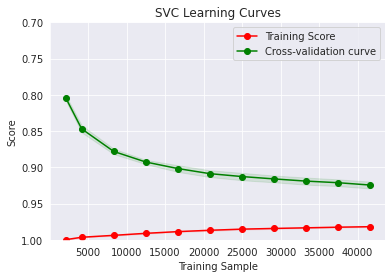

In [25]:
g = plot_learning_curve(svc.grid.best_estimator_, 'SVC Learning Curves',
                       X_train, y_train, ylim = [1.0, 0.7], cv = 5,
                       train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### 3.4 Decision Tree

In [26]:
dt = Class(clf = DecisionTreeClassifier)
dt.grid_search(parameters = [{'criterion':['entropy', 'gini'], 
                             'max_features': ['sqrt', 'log2']}], Kfold = 5)
dt.grid_fit(X = X_train, Y = y_train)
dt.grid_predict_train(X_train, y_train)
dt.grid_predict_test(X_test, y_test)

Training Accuracy: 99.91%
Testing Accuracy: 80.40%


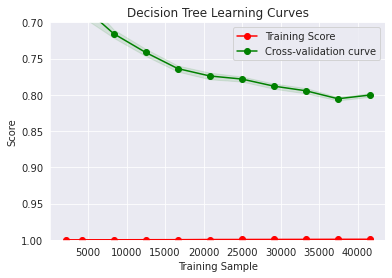

In [27]:
g = plot_learning_curve(dt.grid.best_estimator_, 'Decision Tree Learning Curves',
                       X_train, y_train, ylim = [1.0, 0.7], cv = 5,
                       train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

### 3.5 Gradient Boosting

In [28]:
# gb = Class(clf = GradientBoostingClassifier)
# param_grid = {'n_estimators':[20, 40, 60, 80, 100]}
# gb.grid_search(parameters = param_grid, Kfold = 5)
# gb.grid_fit(X = X_train, Y = y_train)
# gb.grid_predict_train(X_train, y_train)
# gb.grid_predict_test(X_test, y_test)

In [29]:
# g = plot_learning_curve(gb.grid.best_estimator_, 'Gradient Boost Classifier Learning Curves',
#                        X_train, y_train, ylim = [1.0, 0.7], cv = 5,
#                        train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

I left this model not to run because I have a limitation of resources perhaps more GPU 

## 3.6 Naive Bayes

In [30]:
clf = MultinomialNB().fit(X_train, y_train)
test_predict = clf.predict(X_test)
train_predict = clf.predict(X_train)
print("Training Accuracy: {:.2f}%".format(100*metrics.accuracy_score(y_train, train_predict)))
print("Testing Accuracy: {:.2f}%".format(100*metrics.accuracy_score(y_test, test_predict)))

Training Accuracy: 92.89%
Testing Accuracy: 89.68%


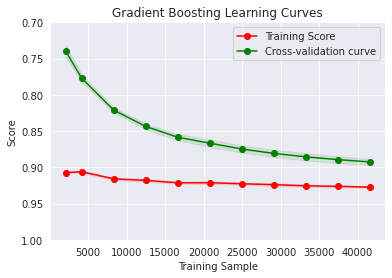

In [31]:
g = plot_learning_curve(MultinomialNB(), 'Gradient Boosting Learning Curves',
                       X_train, y_train, ylim = [1.0, 0.7], cv = 5,
                       train_sizes = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

In [32]:
knn_best = KNeighborsClassifier(**knn.grid.best_params_)
lr_best = LogisticRegression(**lr.grid.best_params_)
svc_best = SVC(**svc.grid.best_params_)

Based on the performance of the model, we can use several models to use in prediction such as KNN, SVC, and Logistic Regression. I choose SVC instead logistic and KNN because of the higher score.

## 5. Prediction

In [33]:
#using the SVC model and execute the result
param_grid = {'C': np.logspace(-2, 2, 10)}
model = GridSearchCV(svm.LinearSVC(), param_grid, cv = 5)
classifier = model.fit(X_train, y_train)

In [34]:
#show the prediction from 15 first row
prediction = classifier.predict(X_test)
y_prediction = classifier.predict(X_test[:15])
y_actual = y_test[:15].values
data_prediction = {'y_prediction':y_prediction, 'y_actual':y_actual}
print('Accuracy: {:.2f}%'.format(100*metrics.accuracy_score(y_test, prediction)))
df = pd.DataFrame(data_prediction)
df

Accuracy: 92.67%


,y_prediction,y_actual
0,Technology,Technology
1,Technology,Technology
2,Business,Business
3,Entertainment,Entertainment
4,Entertainment,Entertainment
5,Business,Business
6,Entertainment,Medical
7,Technology,Technology
8,Entertainment,Entertainment
9,Technology,Entertainment


From the first 15 rows of test data, there are two wrong answer to predict such as in row six the actual data is Medical but the prediction is Entertainment, and row nine shows the actual data suppose to be Entertainment but the prediction is Technology. 

## 6. Summary

All of the steps are same like in the first task such as cleaning data, EDA, text cleaning, modelling and evaluation.

On the other hand, there are a little bit different on the usage of vectorization. In this task I use **TF-IDF** to normalize the factor instead counting the word using **BoW**

The result is better with more than **90% accuracy** compared to the first task. Moreover, I add more models in order to find the best model and of course to see the underfitting and overfitting of the model using learning curve method.

This model can be improved by using **Deep Learning** concept because the data is so much and it will better to use Deep Learning. I prefer to use Tensorflow for this case, why? It is because we can set the **EarlyStopping** to prevent the loss to get overfitting and it will be usefull if we run a lot of **Epochs**